<a href="https://colab.research.google.com/github/lovecrushfamily/2021-CS109A/blob/master/content/lectures/lecture06/notebook/s4-exa2-challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title :
Exercise: Bias Variance Tradeoff
    
## Description :
The aim of this exercise is to understand **bias variance tradeoff**. For this, you will fit a polynomial regression model with different degrees on the same data and plot them as given below.

<img src="https://github.com/Harvard-IACS/2021-CS109A/blob/master/content/lectures/lecture06/fig/fig1.png?raw=1" style="width: 500px;">

## Data Description:

## Instructions:

- Read the file `noisypopulation.csv` as a Pandas dataframe.
- Assign the response and predictor variables appropriately as mentioned in the scaffold.
- Perform sampling on the dataset to get a subset.
- For each sampled version fo the dataset:
    - For degree of the chosen degree value:
        - Compute the polynomial features for the training
        - Fit the model on the given data
        - Select a set of random points in the data to predict the model
        - Store the predicted values as a list
- Plot the predicted values along with the random data points and true function as given above.


## Hints:

FUNCTION SIGNATURE:
gen(degree, number of samples, number of points, x, y)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.PolynomialFeatures()</a>
Generates polynomial and interaction features

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a>
LinearRegression fits a linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model.

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [28]:
#Import necessary libraries
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [29]:
# Helper function to define plot characteristics
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$", fontsize=18)
    axes[0].set_xlabel("$x$", fontsize=18)
    axes[1].set_xlabel("$x$", fontsize=18)
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes


In [30]:
# Reading the file into a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/lovecrushfamily/2021-CS109A/refs/heads/master/content/lectures/lecture06/data/noisypopulation.csv")
df


,f,x,y
0,0.047790,0.00,0.011307
1,0.051199,0.01,0.010000
2,0.054799,0.02,0.007237
3,0.058596,0.03,0.000056
4,0.062597,0.04,0.010000
...,...,...,...
195,0.933193,0.95,0.889002
196,0.937403,0.96,0.872178
197,0.941404,0.97,0.912544
198,0.945201,0.98,0.920384


In [31]:
###edTest(get_data)###

# Set column x is the predictor and column y is the response variable.
# Column f is the true function of the given data
# Select the values of the columns

x = df.x.to_frame()
f = df.f.to_frame()
y = df.y.to_frame()


In [32]:
# Function to compute the Polynomial Features for the data x
# for the given degree d
def polyshape(d, x):
    return PolynomialFeatures(degree=d).fit_transform(x)


In [33]:
# Function to fit a Linear Regression model
def make_predict_with_model(x, y, x_pred):

    # Create a Linear Regression model with fit_intercept as False
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model to the data x and y got parameters to the function
    lreg.fit(x, y)

    # Predict on the x_pred data got as a parameter to this function
    y_pred = lreg.predict(x_pred)

    # Return the linear model and the prediction on the test data
    return lreg, y_pred


In [34]:
# Function to perform sampling and fit the data, with the following parameters

# degree is the maximum degree of the model
# num_sample is the number of samples
# size is the number of random points selected from the data for each sample
# x is the predictor variable
# y is the response variable

def gen(degree, num_sample, size, x, y):

    # Create 2 lists to store the prediction and model
    predicted_values, linear_models =[], []

    # Loop over the number of samples
    for i in range(num_sample):

        # Helper code to call the make_predict_with_model function to fit on the data
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))

        # lreg and y_pred hold the model and predicted values for the current sample
        # Access the values using .iloc for both x and y with indexes
        lreg, y_pred = make_predict_with_model(polyshape(degree, x.iloc[indexes]), y.iloc[indexes], polyshape(degree, x))

        # Append the model and predicted values to the appropriate lists
        predicted_values.append(y_pred)
        linear_models.append(lreg)

    # Return the 2 lists, one for predicted values and one for the model
    return predicted_values, linear_models


In [35]:
# Call the function gen() twice with x and y as the
# predictor and response variable respectively

# Set the number of samples to 200 and the number of points as 30
# Store the return values in appropriate variables

# Get results for degree 1
predicted_1, model_1 = gen(1, 200, 30, x, y);

# Get results for degree 100
predicted_100, model_100 = gen(10, 200, 30, x, y);


<Figure size 1200x800 with 0 Axes>

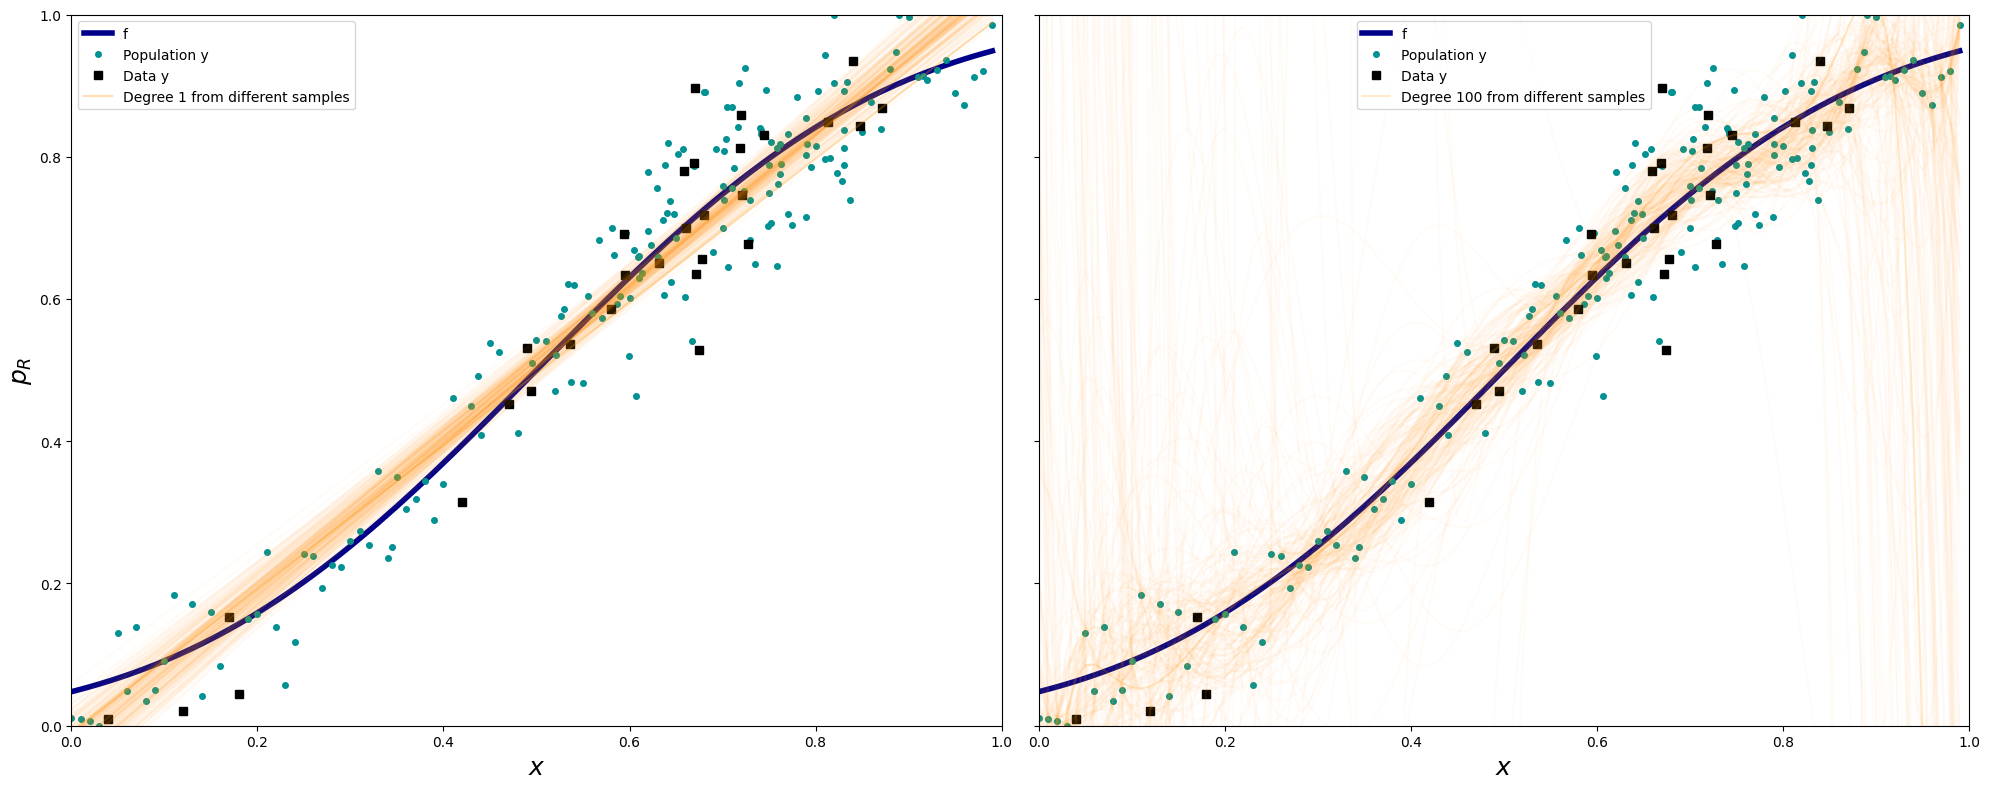

In [36]:
# Helper code to plot the data
indexes = np.sort(np.random.choice(x.shape[0], size=30, replace=False))

plt.figure(figsize = (12,8))
axes=make_plot()

# Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x.iloc[indexes], y.iloc[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples")


# Plot for Degree 100
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x.iloc[indexes], y.iloc[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x,predicted_100[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples")

axes[0].legend(loc='best')
axes[1].legend(loc='best')

plt.tight_layout();
plt.show();


#### ⏸ Does changing the degree from 100 to 10 reduce variance? Why or why not?


In [37]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below
answer1 = 'Yeah, it readuce alot variance of the model, the data seem to be more stable.'
